In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class CanonicalSystem():
    def __init__(self, runTime, dt, a_x=1.0, pattern='discrete'):
        self.runTime = runTime
        self.dt = dt
        self.pattern = pattern
        self.a_x = a_x
        
        if self.pattern == 'discrete':
            self.step = self.step_discrete
        elif self.pattern == 'rythmic':
            self.step = self.step_rythmic
        else:
            raise Exception("invalid pattern type: discrete or rythmic")
            
        self.n_step = int(self.runTime/self.dt)
        
        self.reset()
        
    def reset(self):
        self.x = 1.0
        
        return self.x
    
    def step_discrete(self, tau=1.0, error=0.0):
        """
        generate a single step of x for discrete loop movements
        by decaying from 1 to 0 according to dx = -a_x*x
        
        - tau float: gain on execution time
                     increase tau to make the system execute faster
        - error_coupling float: slow down if the error is > 1
        """
        error_coupling = 1/(1 + error)
        self.x += (-self.a_x*self.x*error_coupling)*tau*self.dt
        
        return self.x
    
    def step_rythmic(self, tau=1.0, error=0.0):
        """
        generate a single step of x for rythmic closed loop movements
        by decaying from 1 to 0 according to dx = -a_x*x
        
        - tau float: gain on execution time
                     increase tau to make the system execute faster
        - error_coupling float: slow down if the error is > 1
        """
        error_coupling = 1/(1 + error)
        self.x += (1*error_coupling*tau)*self.dt
        
        return self.x  

In [3]:
# define system parameters
dt = 0.001
runTime = 1.0
pattern = 'discrete'

cs = CanonicalSystem(dt=dt, runTime=runTime, pattern=pattern)

In [4]:
# normal state track w/o error
x_track1 = np.zeros(cs.n_step)
for i in range(cs.n_step):
    x_track1[i] = cs.step()

# state track w/ error
cs.reset()
x_track2 = np.zeros(cs.n_step)
error = np.zeros(cs.n_step)
error[200:400] = 1
for j in range(cs.n_step):
    x_track2[j] = cs.step(error=error[j])

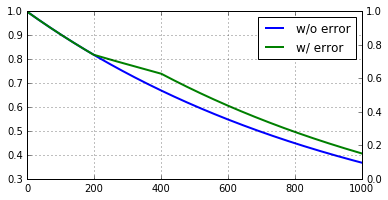

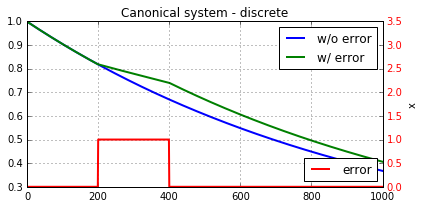

In [6]:
fig, ax1 = plt.subplots(figsize=(6,3))
ax1.plot(x_track1, lw=2)
ax1.plot(x_track2, lw=2)
plt.grid()
plt.legend(['w/o error', 'w/ error'])
ax2 = ax1.twinx()
ax2.plot(error, 'r-', lw=2)
plt.legend(['error'], loc='lower right')
plt.ylim(0, 3.5)
plt.xlabel('time (s)')
plt.ylabel('x')
plt.title('Canonical system - discrete')


for t1 in ax2.get_yticklabels():
    t1.set_color('r')

plt.tight_layout()

plt.show()

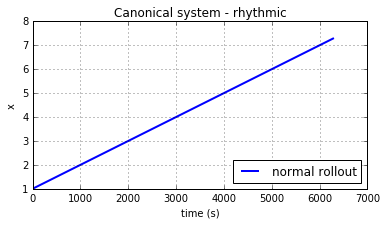

In [7]:
dt = 0.001
runTime = 2*np.pi
pattern = 'rythmic'

cs = CanonicalSystem(dt=.001, runTime=runTime, pattern=pattern)
x_track3 = np.zeros(cs.n_step)
for k in range(cs.n_step):
    x_track3[k] = cs.step()

import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(6,3))
ax1.plot(x_track3, lw=2)
plt.grid()
plt.legend(['normal rollout'], loc='lower right')
plt.xlabel('time (s)')
plt.ylabel('x')
plt.title('Canonical system - rhythmic')
plt.show()
